In [49]:
import pandas as pd
import numpy as  np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot  as plt
import seaborn as sns

In [50]:
# 读取 .xlsm 文件
file_path = 'whine.xlsm'

# 使用 openpyxl 引擎读取文件
wine = pd.read_excel(file_path, engine='openpyxl')

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

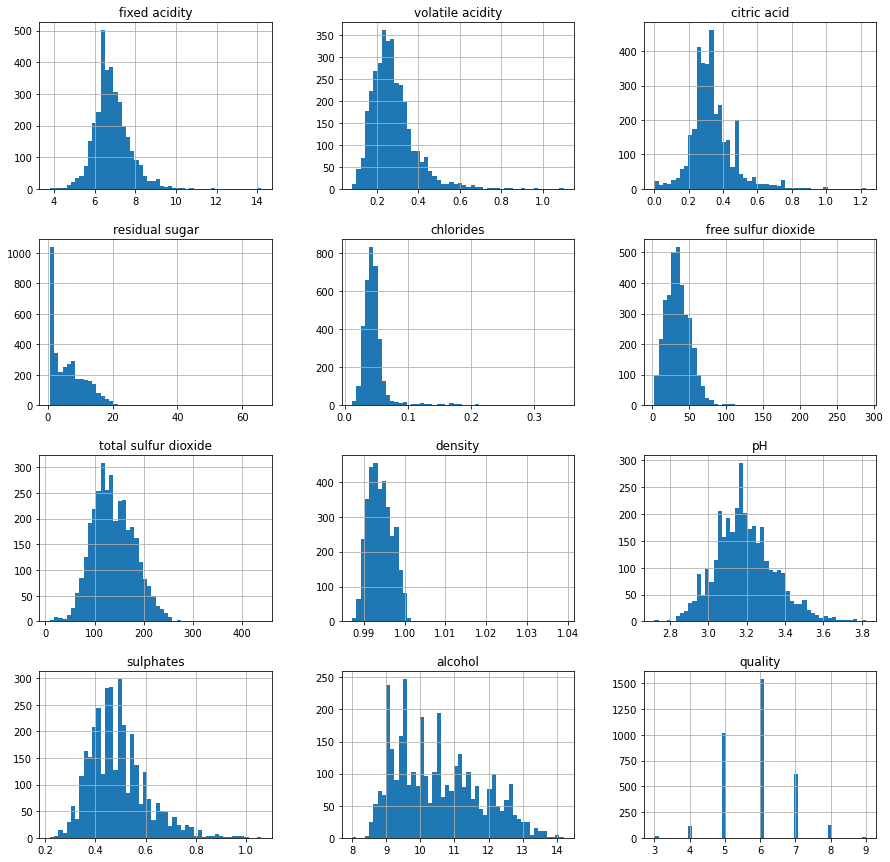

In [51]:
# 特征分布
wine.hist(bins=50, figsize=(15,15))
# plt.show()

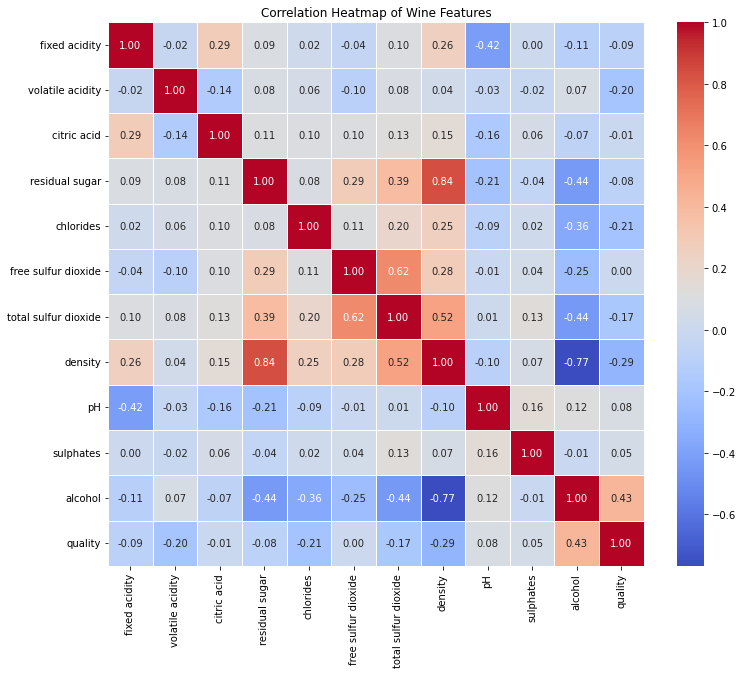

In [52]:
# 特征之间的相关性

# 计算相关性矩阵
correlation_matrix = wine.corr()
# 设置图形大小
plt.figure(figsize=(12, 10))
# 绘制热力图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# 设置标题
plt.title('Correlation Heatmap of Wine Features')
# 显示图形
plt.show()

In [53]:
X = wine[ ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

y=wine['quality'].values
y = (y>=6).astype(int) 
print(np.sum(y==1, axis=0)) # 高品质数量
print(np.sum(y==0, axis=0)) # 低品质数量

2282
1149


In [54]:
# 划分分为训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

lr=LogisticRegression(solver='liblinear',  multi_class='auto') 
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test) 

print(confusion_matrix(y_test, y_pred)) # 混淆矩阵
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f值

[[106 124]
 [ 40 417]]
0.7612809315866085
0.7707948243992606
0.912472647702407
0.8356713426853707


/Users/fanhongyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost
import sklearn

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

In [56]:
classifiers = []

model1 = LogisticRegression(solver='liblinear',  multi_class='auto', max_iter=10000) 
classifiers.append(model1)

model2 = LinearSVC(max_iter=10000)
classifiers.append(model2)

model3 = DecisionTreeClassifier()
classifiers.append(model3)

model4 = RandomForestClassifier(random_state = 23)
classifiers.append(model4)

model5 = xgboost.XGBClassifier()
classifiers.append(model5)

In [57]:
from statistics import mean
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

for clf in classifiers:
    score_train = []
    score_test = []
    print(clf)
    for train_ind, test_ind in kfold.split(X):
      X_train = X[train_ind]
      y_train = y[train_ind]
      X_test = X[test_ind]
      y_test = y[test_ind]
      clf.fit(X_train, y_train)
      y_pred= clf.predict(X_test)
      acc = accuracy_score(y_test, y_pred)
      print("Accuracy = %s"%( acc))
      score_test.append(acc)
    print("Mean Accuracy of %s is %s"%(clf, mean(score_test)))
    print("----------------------------------")

LogisticRegression(max_iter=10000, multi_class='auto', solver='liblinear')
Accuracy = 0.7496360989810772
Accuracy = 0.7711370262390671
Accuracy = 0.7521865889212828
Accuracy = 0.760932944606414
Accuracy = 0.7332361516034985
Mean Accuracy of LogisticRegression(max_iter=10000, multi_class='auto', solver='liblinear') is 0.7534257620702679
----------------------------------
LinearSVC(max_iter=10000)
Accuracy = 0.75254730713246
Accuracy = 0.7638483965014577
Accuracy = 0.7580174927113703
Accuracy = 0.7667638483965015
Accuracy = 0.7332361516034985
Mean Accuracy of LinearSVC(max_iter=10000) is 0.7548826392690576
----------------------------------
DecisionTreeClassifier()
Accuracy = 0.7496360989810772
Accuracy = 0.7565597667638484


/Users/fanhongyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/fanhongyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/fanhongyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/fanhongyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_log

Accuracy = 0.7959183673469388
Accuracy = 0.7711370262390671
Accuracy = 0.750728862973761
Mean Accuracy of DecisionTreeClassifier() is 0.7647960244609385
----------------------------------
RandomForestClassifier(random_state=23)
Accuracy = 0.826783114992722
Accuracy = 0.826530612244898
Accuracy = 0.8177842565597667
Accuracy = 0.8338192419825073
Accuracy = 0.826530612244898
Mean Accuracy of RandomForestClassifier(random_state=23) is 0.8262895676049584
----------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_ste

In [58]:
#train random forest
forest = RandomForestClassifier(random_state = 23)
forest.fit(X_train, y_train)
y_pred= forest.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%("RandomForestClassifier", acc))

Accuracy of RandomForestClassifier is 0.826530612244898


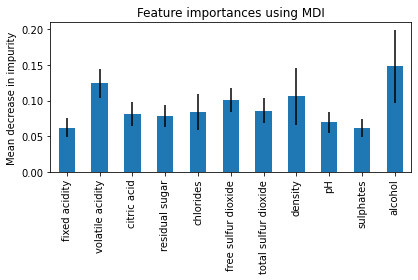

In [59]:
importances = list(forest.feature_importances_)

forest_importances = pd.Series(importances, index=wine.columns[:-1])
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

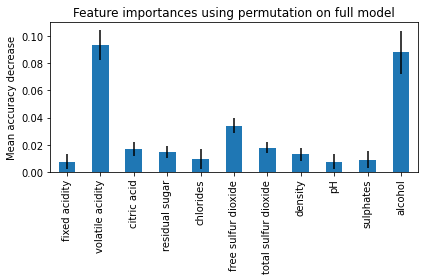

In [60]:
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=23, n_jobs=-1
)

forest_importances = pd.Series(result.importances_mean, index=wine.columns[:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [61]:
important_feature_index = np.where(forest_importances.values > 0.005)[0]
print('Number of features for 5% importance:', len(important_feature_index))
important_feature_names = [wine.columns[index] for index in important_feature_index]
important_feature_names

Number of features for 5% importance: 11


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [62]:
X_train_important = X_train[:,important_feature_index]
X_test_important = X_test[:,important_feature_index]
print('Important train features shape:', X_train_important.shape)
print('Important test features shape:', X_test_important.shape)
#trin random forest with only important feature
forest = RandomForestClassifier(random_state = 23)
forest.fit(X_train_important, y_train)
y_pred= forest.predict(X_test_important)
acc_importance = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%("RandomForestClassifie with important featurer", acc_importance))

print('Improvement of {:0.2f}%'.format( 100 * (acc_importance - acc) / acc))

Important train features shape: (2745, 11)
Important test features shape: (686, 11)
Accuracy of RandomForestClassifie with important featurer is 0.826530612244898
Improvement of 0.00%
